<a href="https://colab.research.google.com/github/pabodaR/crop-yield-prediction/blob/main/crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Crop Yield Prediction**

### Step 1: Data Exploration and Preparation

1. **Explore the Dataset:**
   - Familiarize with the dataset columns (`Area`, `Item`, `Year`, `average_rain_fall_mm_per_year`, `pesticides_tonnes`, `avg_temp`, `hg/ha_yield`) and understand their meanings and potential correlations.

2. **Data Cleaning:**
   - Handle missing values
   - Remove duplicates

### Step 2: Data Visualization and Analysis

1. **Correlation Analysis:**
   - Explore correlations between `hg/ha_yield` (target variable) and other features (`average_rain_fall_mm_per_year`, `pesticides_tonnes`, `avg_temp`, etc.) using scatter plots, heatmaps, or correlation coefficients.

### Step 3: Model Selection and Training

1. **Split Data into Training and Testing Sets:**
   - Reserve a portion of the dataset (
     70-30 split) for training and testing the models.

2. **Choose Regression Models:**
   - Consider regression algorithms suitable the dataset, such as linear regression, decision trees, random forests, or gradient boosting regressors.

3. **Model Training:**
   - Train the selected models on the training dataset. Use cross-validation techniques to tune hyperparameters and avoid overfitting.

### Step 4: Model Evaluation and Refinement

1. **Evaluate Model Performance:**
   - Use metrics like Mean Squared Error (MSE), R-squared, or Mean Absolute Error (MAE) to evaluate how well the models predict `hg/ha_yield` on the test dataset.

2. **Refine Models:**
   - Fine-tune models by adjusting hyperparameters based on performance metrics. Consider feature selection techniques to improve model accuracy and interpretability.






**Read Dataset**

In [ ]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/portfolio/regression/yield_df.csv')
df.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


**Explore the Dataset**

**1. Area**

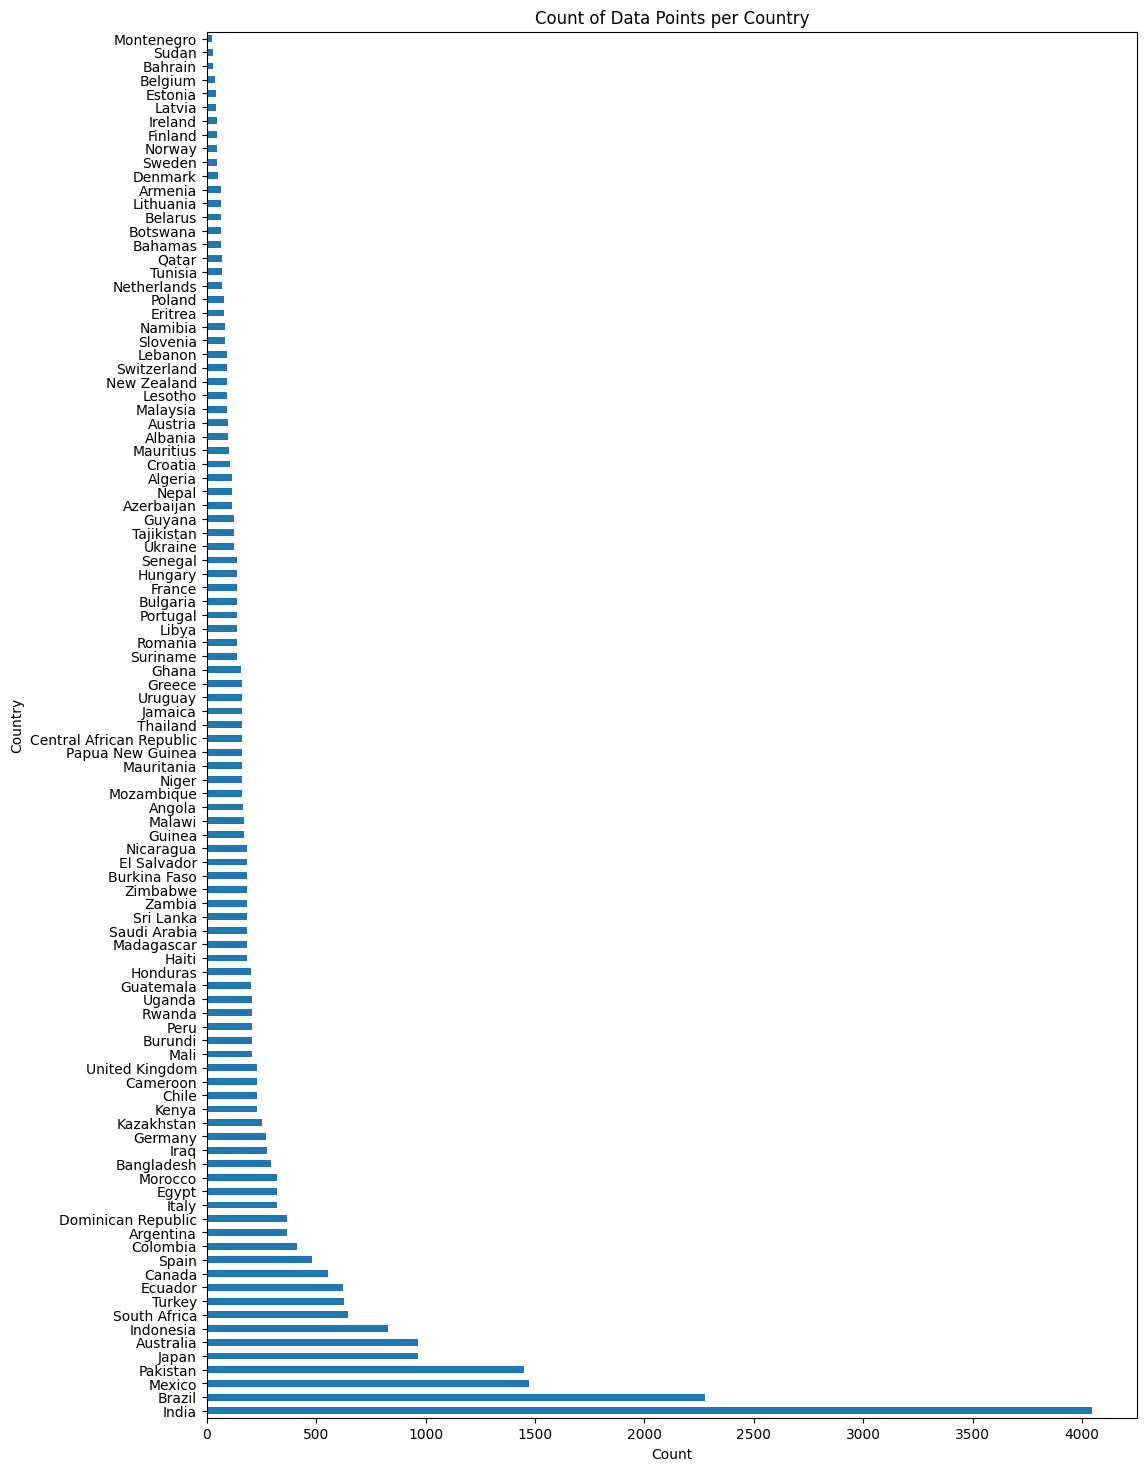

In [ ]:
import matplotlib.pyplot as plt
country_counts = df['Area'].value_counts()

# Plotting the counts of each country
plt.figure(figsize=(12, 18))  # Adjust height for readability
country_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Count of Data Points per Country')
plt.show()


**Conclusion:**


*   India has the most amount of crop yeild data with Brazil and Mexico in 2nd and 3rd places



**2. Items**

Text(0.5, 1.0, 'Distribution of Items')

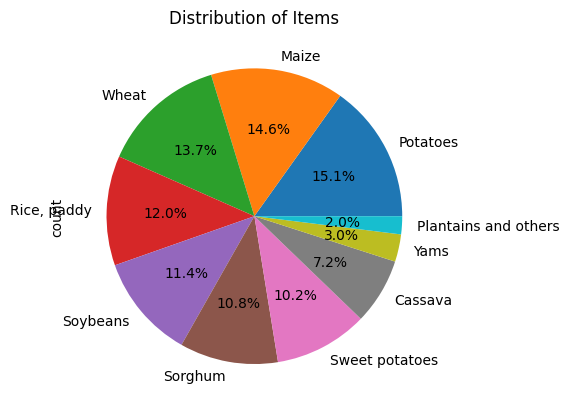

In [ ]:
df['Item'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Items')

**Conclusion:**


*   Potatoes, maize and wheat are the top 3 most grown crops across all areas.
*   Plantains and others are the least grown crops.



**3. Year**

Text(0.5, 1.0, 'Distribution of Years')

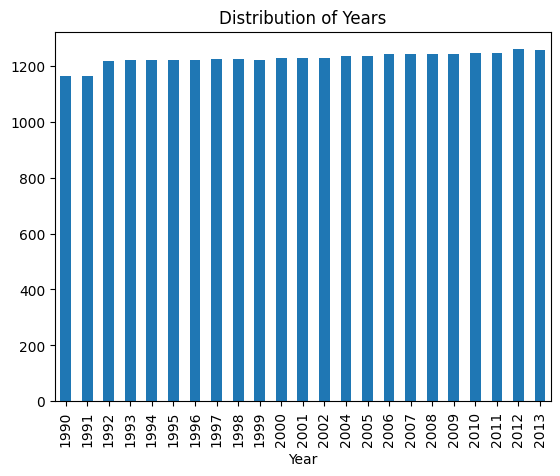

In [ ]:
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Years')

**Conclusion:**


*   Dataset ranges from 1990 to 2013



**4. hg/ha_yield**

In [ ]:
df['hg/ha_yield'].describe()

count     28242.000000
mean      77053.332094
std       84956.612897
min          50.000000
25%       19919.250000
50%       38295.000000
75%      104676.750000
max      501412.000000
Name: hg/ha_yield, dtype: float64

1.7932285390815392

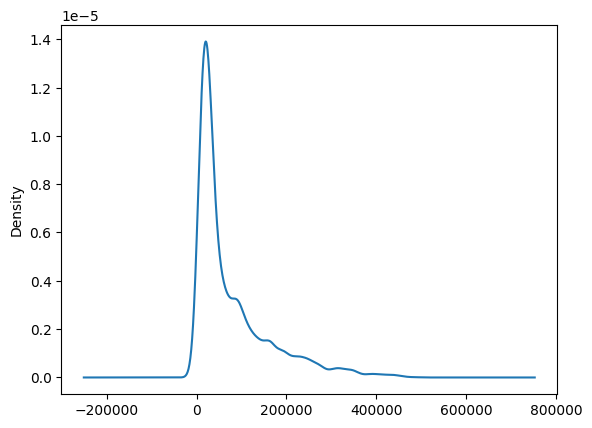

In [ ]:
df['hg/ha_yield'].plot(kind='kde')
df['hg/ha_yield'].skew()

**Conclusion**
*   hg/ha yield value is positively skewed




<Axes: >

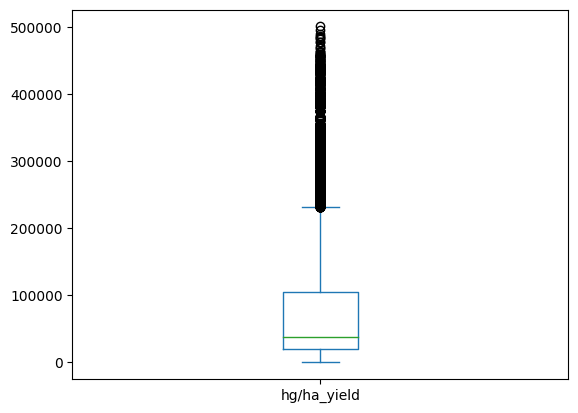

In [ ]:
df['hg/ha_yield'].plot(kind='box')

**5. Average Rain Fall per Year (mm)**

In [ ]:
df['average_rain_fall_mm_per_year'].describe()

count    28242.00000
mean      1149.05598
std        709.81215
min         51.00000
25%        593.00000
50%       1083.00000
75%       1668.00000
max       3240.00000
Name: average_rain_fall_mm_per_year, dtype: float64

0.8538319647106902

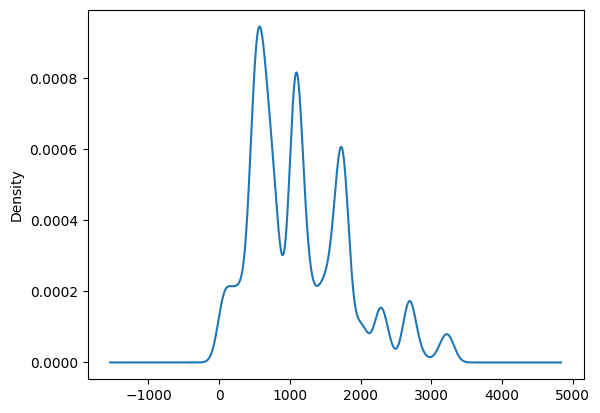

In [ ]:
df['average_rain_fall_mm_per_year'].plot(kind='kde')
df['average_rain_fall_mm_per_year'].skew()

**Conclusion:**


*   The average rain fall per year is moderately right skewed



<Axes: >

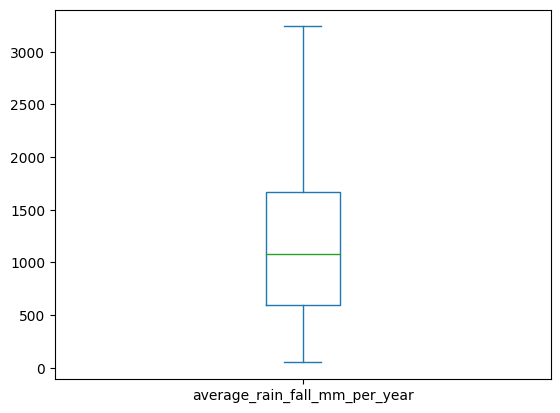

In [ ]:
df['average_rain_fall_mm_per_year'].plot(kind='box')

**6. Pesticides (Tonnes)**

In [ ]:
df['pesticides_tonnes'].describe()

count     28242.000000
mean      37076.909344
std       59958.784665
min           0.040000
25%        1702.000000
50%       17529.440000
75%       48687.880000
max      367778.000000
Name: pesticides_tonnes, dtype: float64

3.49028920684912

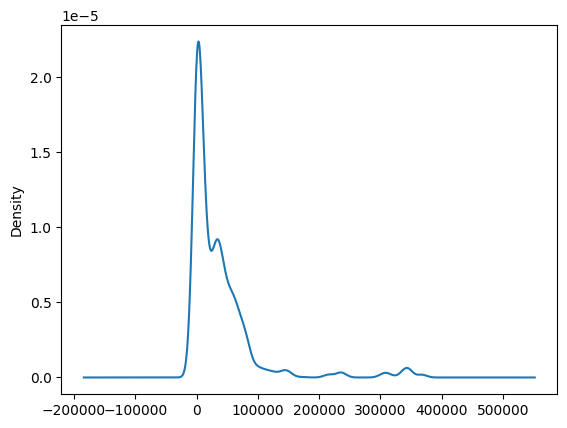

In [ ]:
df['pesticides_tonnes'].plot(kind='kde')
df['pesticides_tonnes'].skew()

**Conclusion:**
*   Pesticides_Tonnes is a heavily right skewed variable



<Axes: >

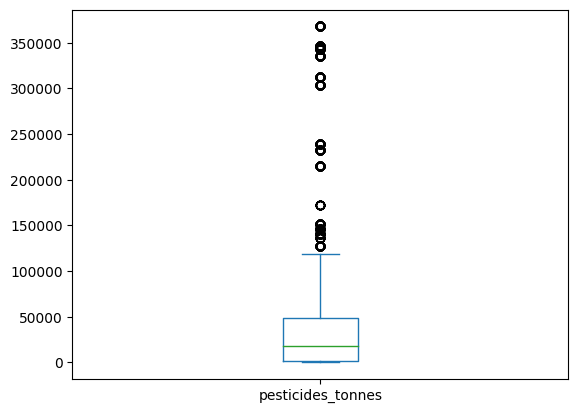

In [ ]:
df['pesticides_tonnes'].plot(kind='box')

**7. Average Temperature**

In [ ]:
df['avg_temp'].describe()

count    28242.000000
mean        20.542627
std          6.312051
min          1.300000
25%         16.702500
50%         21.510000
75%         26.000000
max         30.650000
Name: avg_temp, dtype: float64

-0.7415822956257284

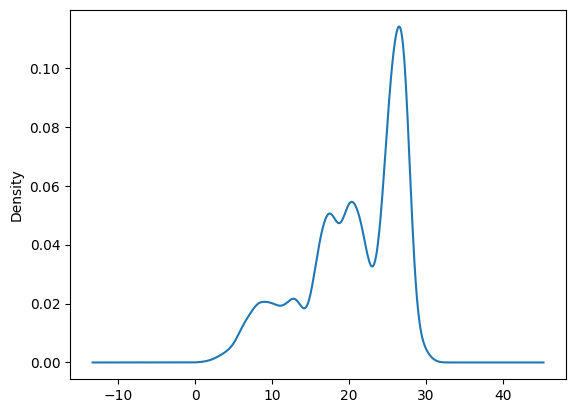

In [ ]:
df['avg_temp'].plot(kind='kde')
df['avg_temp'].skew()

**Conclusion:**


*   Average temperature is moderately left skewed



<Axes: >

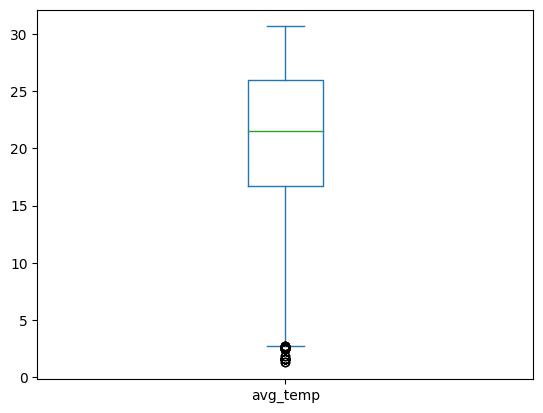

In [ ]:
df['avg_temp'].plot(kind='box')

**Data Cleaning**

**1. Handle null values**

In [ ]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

**2. Handle duplicate values**

In [ ]:
df.duplicated().sum()

0

**3. Remove unnecessary columns**

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

**4. Handle Categorical Variables**

In [ ]:
#label encode area column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Area'] = le.fit_transform(df['Area'])

In [ ]:
#one hot encode the item column
df = pd.get_dummies(df, columns=['Item'], drop_first=True)


In [ ]:
columns_to_convert = ['Item_Maize', 'Item_Plantains and others', 'Item_Potatoes',
                      'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
                      'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams']

# Convert selected columns from boolean to integer (0 or 1)
df[columns_to_convert] = df[columns_to_convert].astype(int)
print(df)



       Area  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0         0  1990        36613                         1485.0   
1         0  1990        66667                         1485.0   
2         0  1990        23333                         1485.0   
3         0  1990        12500                         1485.0   
4         0  1990         7000                         1485.0   
...     ...   ...          ...                            ...   
28237   100  2013        22581                          657.0   
28238   100  2013         3066                          657.0   
28239   100  2013        13142                          657.0   
28240   100  2013        22222                          657.0   
28241   100  2013        22888                          657.0   

       pesticides_tonnes  avg_temp  Item_Maize  Item_Plantains and others  \
0                 121.00     16.37           1                          0   
1                 121.00     16.37           0                   

In [ ]:
df

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1990,36613,1485.0,121.00,16.37,1,0,0,0,0,0,0,0,0
1,0,1990,66667,1485.0,121.00,16.37,0,0,1,0,0,0,0,0,0
2,0,1990,23333,1485.0,121.00,16.37,0,0,0,1,0,0,0,0,0
3,0,1990,12500,1485.0,121.00,16.37,0,0,0,0,1,0,0,0,0
4,0,1990,7000,1485.0,121.00,16.37,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,100,2013,22581,657.0,2550.07,19.76,0,0,0,1,0,0,0,0,0
28238,100,2013,3066,657.0,2550.07,19.76,0,0,0,0,1,0,0,0,0
28239,100,2013,13142,657.0,2550.07,19.76,0,0,0,0,0,1,0,0,0
28240,100,2013,22222,657.0,2550.07,19.76,0,0,0,0,0,0,1,0,0


**Correlation Analysis**

**1. average_rain_fall_mm_per_year & hg/ha_yield**


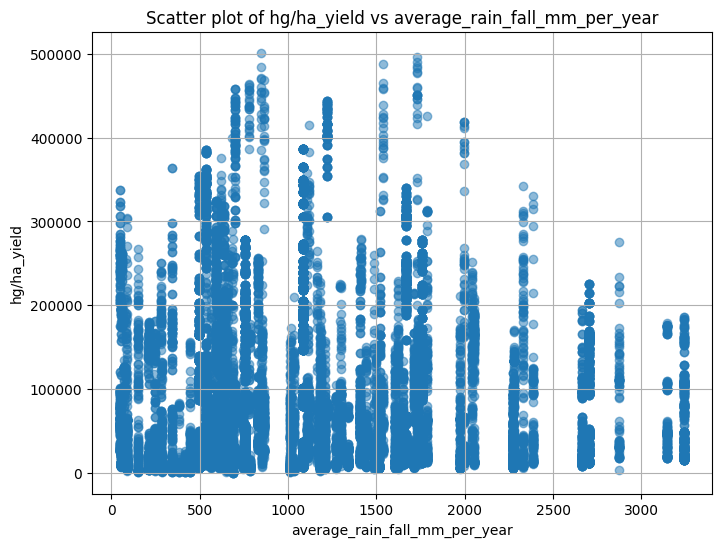

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['average_rain_fall_mm_per_year'], df['hg/ha_yield'], alpha=0.5)
plt.title('Scatter plot of hg/ha_yield vs average_rain_fall_mm_per_year')
plt.xlabel('average_rain_fall_mm_per_year')
plt.ylabel('hg/ha_yield')
plt.grid(True)
plt.show()

In [ ]:
correlation_matrix = df[['hg/ha_yield', 'average_rain_fall_mm_per_year']].corr()
correlation_matrix

,hg/ha_yield,average_rain_fall_mm_per_year
hg/ha_yield,1.000000,0.000962
average_rain_fall_mm_per_year,0.000962,1.000000


**Conclusion:**


*   Pearson correlation coefficient = 0.000962 which is very close to  0 indicating a very weak positive correlation


*   This suggests that changes in average_rain_fall_mm_per_year do not significantly impact hg/ha_yield





**2. pesticides_tonnes & hg/ha_yield**

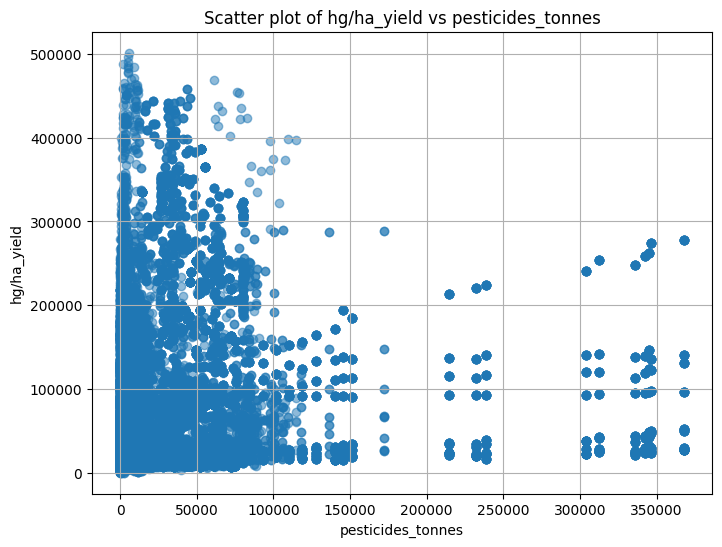

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['pesticides_tonnes'], df['hg/ha_yield'], alpha=0.5)
plt.title('Scatter plot of hg/ha_yield vs pesticides_tonnes')
plt.xlabel('pesticides_tonnes')
plt.ylabel('hg/ha_yield')
plt.grid(True)
plt.show()

In [ ]:
correlation_matrix = df[['hg/ha_yield', 'pesticides_tonnes']].corr()
correlation_matrix

,hg/ha_yield,pesticides_tonnes
hg/ha_yield,1.000000,0.064085
pesticides_tonnes,0.064085,1.000000


**Conclusion:**


*   This value is positive and close to zero (0.064085), indicating a very weak positive correlation between hg/ha_yield and pesticides_tonnes.


**3.hg/ha_yield & avg_temp**

Text(0, 0.5, 'hg/ha_yield')

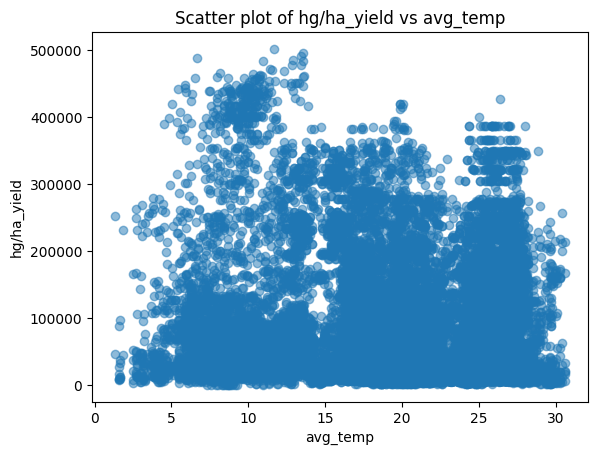

In [ ]:
plt.scatter(df['avg_temp'], df['hg/ha_yield'], alpha=0.5)
plt.title('Scatter plot of hg/ha_yield vs avg_temp')
plt.xlabel('avg_temp')
plt.ylabel('hg/ha_yield')

In [ ]:
correlation_matrix = df[['hg/ha_yield', 'avg_temp']].corr()
correlation_matrix


,hg/ha_yield,avg_temp
hg/ha_yield,1.000000,-0.114777
avg_temp,-0.114777,1.000000


**Conclusion:**

*   Pearson correlation coefficient = -0.114777 this is negative and close to 0, indicating a weak negative correaltion between hg/ha_yield and avg_temp



**Heatmap**

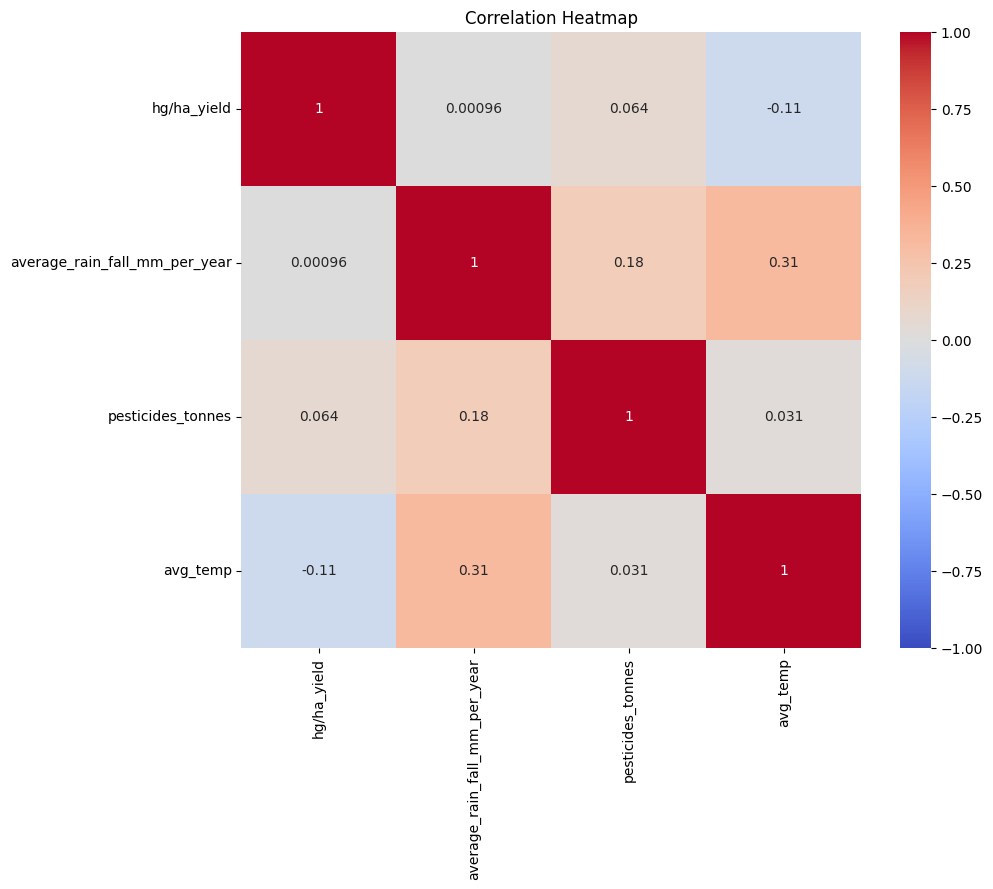

In [ ]:
import seaborn as sns

columns = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
corr_matrix = df[columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Model Selection and Training**


**1. Split Data into Training and Testing Sets:**


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Model Training:**

Train the selected models on the training dataset. Use cross-validation techniques to tune hyperparameters and avoid overfitting

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Predict on the training and test sets
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# Calculate RMSE for training and test sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R^2 score for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Random Forest RMSE - Training: {rmse_train:.4f}, Testing: {rmse_test:.4f}")
print(f"Random Forest R^2 Score - Training: {r2_train:.4f}, Testing: {r2_test:.4f}")

Random Forest RMSE - Training: 3790.1424, Testing: 10021.2567
Random Forest R^2 Score - Training: 0.9980, Testing: 0.9862


**XGBoost**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on the training and test sets
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

# Calculate RMSE for training and test sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R^2 score for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"XGBoost RMSE - Training: {rmse_train:.4f}, Testing: {rmse_test:.4f}")
print(f"XGBoost R^2 Score - Training: {r2_train:.4f}, Testing: {r2_test:.4f}")


XGBoost RMSE - Training: 11427.9960, Testing: 14144.0632
XGBoost R^2 Score - Training: 0.9819, Testing: 0.9724


**Model Evaluation and Refinement with Grid Search and Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {np.sqrt(-grid_search.best_score_):.4f}")

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Predict on the training and test sets
y_train_pred = best_rf_model.predict(x_train)
y_test_pred = best_rf_model.predict(x_test)

# Calculate RMSE for training and test sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R^2 score for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Random Forest RMSE - Training: {rmse_train:.4f}, Testing: {rmse_test:.4f}")
print(f"Random Forest R^2 Score - Training: {r2_train:.4f}, Testing: {r2_test:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 10897.0986
Random Forest RMSE - Training: 3742.3208, Testing: 9996.7925
Random Forest R^2 Score - Training: 0.9981, Testing: 0.9862


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {np.sqrt(-grid_search.best_score_):.4f}")

# Train the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Predict on the training and test sets
y_train_pred = best_xgb_model.predict(x_train)
y_test_pred = best_xgb_model.predict(x_test)

# Calculate RMSE for training and test sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R^2 score for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"XGBoost RMSE - Training: {rmse_train:.4f}, Testing: {rmse_test:.4f}")
print(f"XGBoost R^2 Score - Training: {r2_train:.4f}, Testing: {r2_test:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 10716.2684
XGBoost RMSE - Training: 2596.0626, Testing: 10160.9794
XGBoost R^2 Score - Training: 0.9991, Testing: 0.9858


**Conclusion:**

XGBoost Model:

*   RMSE - Training: 2596.0626, Testing: 10160.9794

*   R^2 Score - Training: 0.9991, Testing: 0.9858

Random Forest Model:

*   RMSE - Training: 3742.3208, Testing: 9996.7925
*   R^2 Score - Training: 0.9981, Testing: 0.9862

Both models show similar R^2 scores on the testing data. However, the Random Forest model has a slightly lower RMSE on the testing set, suggesting it might generalize slightly better than the XGBoost model in terms of prediction error.



---


